### AAI-510 M5 Lab Walkthrough

In this lab walkthrough we will build a Naive Bayes Classifier and analyze the results.

In [ ]:
#@title Loading the required libraries
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline

from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers
from sklearn.naive_bayes import GaussianNB

### Data Processing

In [ ]:
#@title Mounting your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd

/content


In [ ]:
#@title Loading data and viewing it
#df = sns.load_dataset('iris')
df = pd.read_csv('/Data/diabetes.csv')
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

# Show dataframe
df

FileNotFoundError: ignored

In [ ]:
#@title Designating target and features
y = df.Outcome # Target variable
X = df.drop(columns=['Outcome']) # Features by dropping the target column

In [ ]:
#@title Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Naive Bayes Classifier

In [ ]:
#@title Building the NB Classifier

nbc = GaussianNB() # Create Naive Bayes classifer object
nbc = nbc.fit(X_train, y_train) # Train Naive Bayes Classifer

Train Accuracy: 0.7616387337057728
Test Accuracy: 0.7835497835497836
F1 Score: 0.7883108177225825


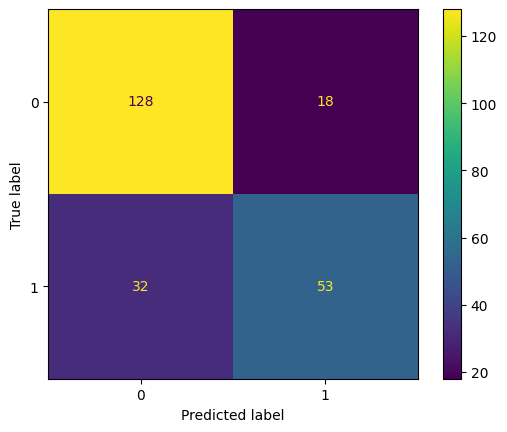

In [ ]:
#@title Evaluating the NB Classifier
y_hat = nbc.predict(X_train) # Predict the response for train dataset
y_pred = nbc.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_pred, y_test, average="weighted"))

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()